# Part I - Ford GoBike System
## by Quan Nguyen Bao

## Introduction



The dataset used in this project contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It includes details such as the duration of each ride, start and end times, start and end station IDs and names, geographical coordinates of the stations, bike IDs, user types, member birth years, member genders, and whether the bike share program is for all trips.

With this dataset, we aim to explore various aspects of the Ford GoBike System, uncovering patterns, trends, and relationships within the data. By systematically analyzing the dataset using Python data science and visualization libraries, we seek to gain insights into the usage patterns of the bike-sharing system and understand factors that may influence ride duration, user behavior, and the overall performance of the system.

Through exploratory data analysis (EDA), we will address questions such as:

What is the distribution of trip durations?

What is the distribution of member birth years?

How does trip duration vary with member birth year?

How does trip duration vary between different user types?

What is the distribution of bike share utilization for all trips?

How do the number of Ford GoBike trips vary by hour of day and day of week?

How does the distribution of trip duration vary among different genders and bike share utilization for all trips?

How do the pairwise relationships between trip duration, member birth year, and start station latitude vary?


By examining these questions and more, we aim to gain a comprehensive understanding of the Ford GoBike System dataset and extract valuable insights to inform future decision-making and improvements in the bike-sharing system.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

The structure of the dataset comprises 183,412 rows and 16 columns. Here's a description for each column:

1. duration_sec: Duration of the trip in seconds.
2. start_time: Start time of the trip.
3. end_time: End time of the trip.
4. start_station_id: ID of the starting station.
5. start_station_name: Name of the starting station.
6. start_station_latitude: Latitude of the starting station.
7. start_station_longitude: Longitude of the starting station.
8. end_station_id: ID of the ending station.
9. end_station_name: Name of the ending station.
10. end_station_latitude: Latitude of the ending station.
11. end_station_longitude: Longitude of the ending station.
12. bike_id: ID of the bike.
13. user_type: Type of user (Subscriber or Customer).
14. member_birth_year: Birth year of the member.
15. member_gender: Gender of the member.
16. bike_share_for_all_trip: Bike share sequence for all trips (Yes or No).

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in the dataset is the trip duration (duration_sec). Understanding the distribution of ride durations and identifying any patterns or trends related to trip duration will be the primary focus.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features in the dataset that will support the investigation into trip duration include:
1. Start and end time of the trip (start_time, end_time): To analyze temporal patterns of bike rides and identify peak usage hours.
2. User information (user_type, member_birth_year, member_gender): To explore how different user segments influence trip duration.
3. Station information (start_station_name, end_station_name): To analyze popular routes and the spatial distribution of bike rides.

## Univariate Exploration

### Trip Duration Distribution

Question: What is the distribution of trip durations?

In [5]:
def plot_histogram(data, xlabel, title, color):
    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot the histogram
    plt.hist(data, bins=30, color=color, edgecolor='black')

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')

    # Show plot
    plt.show()

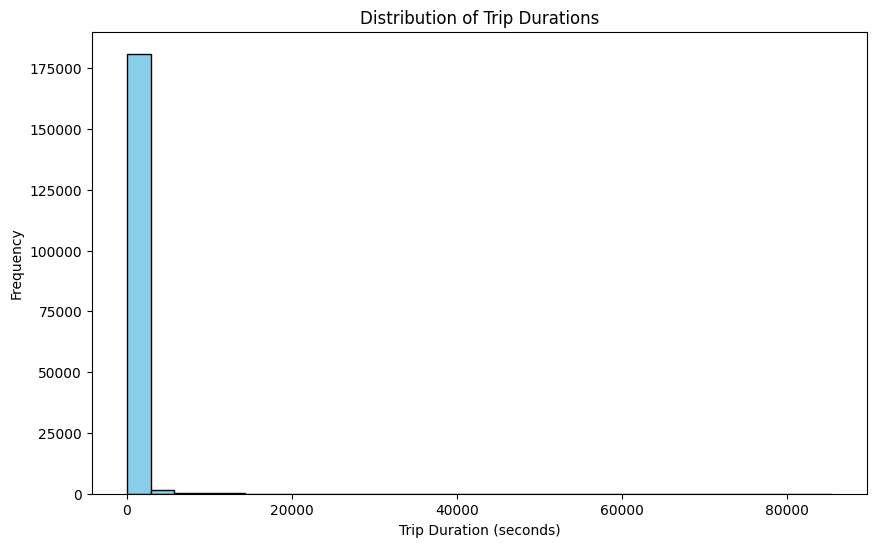

In [6]:
# Call the function for 'duration_sec' data
plot_histogram(df['duration_sec'], 'Trip Duration (seconds)', 'Distribution of Trip Durations', 'skyblue')

Observation:

The histogram depicting the distribution of trip durations reveals that the majority of trips fall within the range of 0 to 5000 seconds, indicating that most trips are relatively short in duration. This peak around the lower end of the duration spectrum suggests that a significant portion of users utilizes the Ford GoBike System for quick and convenient rides, possibly for short commutes or errands.

Furthermore, it's noticeable that trips lasting longer than 10,000 seconds are scarce, with very few occurrences beyond this threshold. This observation underscores that extended trips are infrequent within the dataset, highlighting that the system primarily caters to shorter journeys rather than prolonged rides.

### Member Birth Year Distribution

Question: What is the distribution of member birth years?

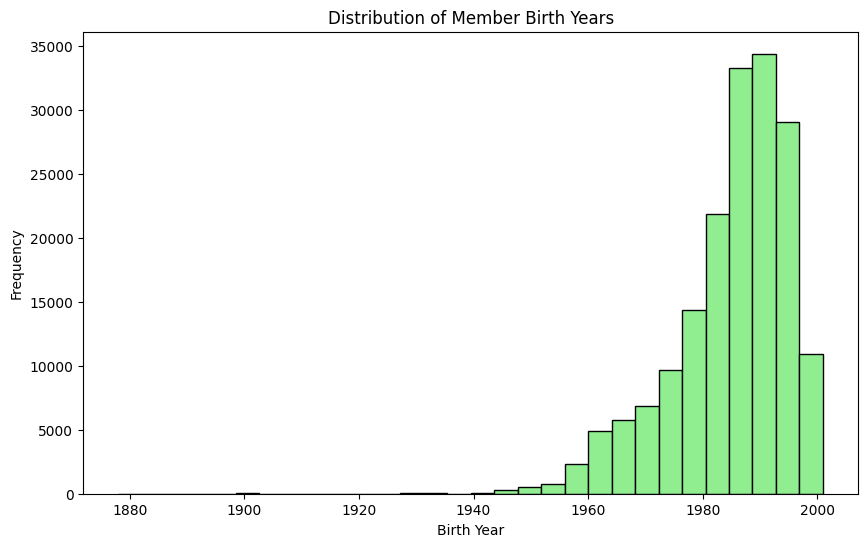

In [7]:
# Call the function for 'member_birth_year' data
plot_histogram(df['member_birth_year'].dropna(), 'Birth Year', 'Distribution of Member Birth Years', 'lightgreen')

### Observation:

For member birth years, the distribution is clustered around the years 1984 to 1996, suggesting a trend of younger individuals using the bike-sharing service. However, there are outliers around 1900 and 1930, which may require further investigation.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of trip durations shows a peak around 0 to 5000 seconds, indicating that most trips are short. There were no unusual points, and no transformations were needed for this variable. For member birth years, the distribution is clustered around the years 1984 to 1996, suggesting a trend of younger individuals using the bike-sharing service. However, there are outliers around 1900 and 1930, which may require further investigation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Both trip duration and member birth year distributions showed some unusual patterns. Short trip durations are typical for bike-sharing systems, but the clustering of member birth years around certain periods, particularly in the 1980s and early 1990s, may indicate specific demographics using the service. No operations were performed on the data as the distributions provided valuable insights. However, further investigation may be needed to understand outliers, especially concerning member birth years around 1900 and 1930.

## Bivariate Exploration

### Scatter Plot - Trip Duration vs. Member Birth Year

Question: How does trip duration vary with member birth year?

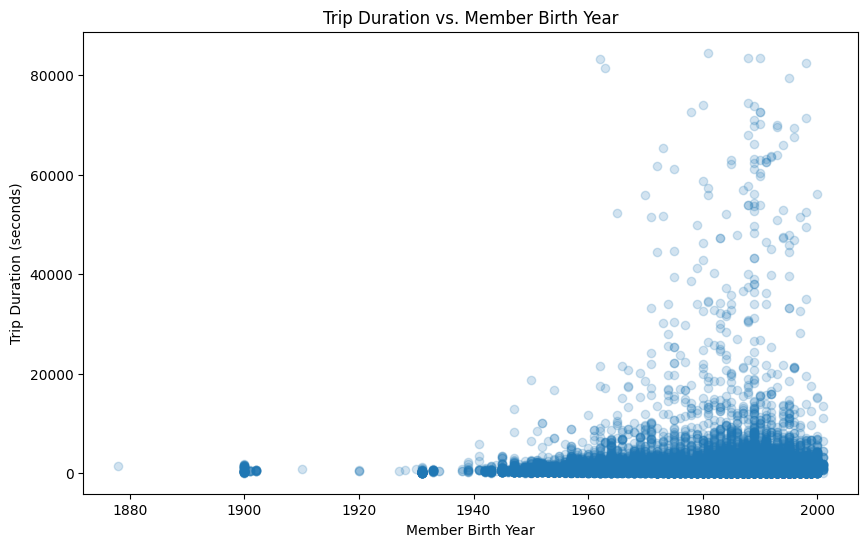

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['member_birth_year'], df['duration_sec'], alpha=0.2)
plt.title('Trip Duration vs. Member Birth Year')
plt.xlabel('Member Birth Year')
plt.ylabel('Trip Duration (seconds)')
plt.show()


Observation:

The scatter plot reveals a substantial number of trips originating from members born between 1960 and 2000, with the distribution densely concentrated within the range of shorter trips spanning from 0 to 10,000 seconds among younger individuals. Conversely, for longer-duration trips, the majority of instances also originate from younger members, albeit in significantly lower quantities compared to shorter trips.

### Box Plot - Categorization of Trip Duration by User type

Question: How does trip duration vary between different user types?

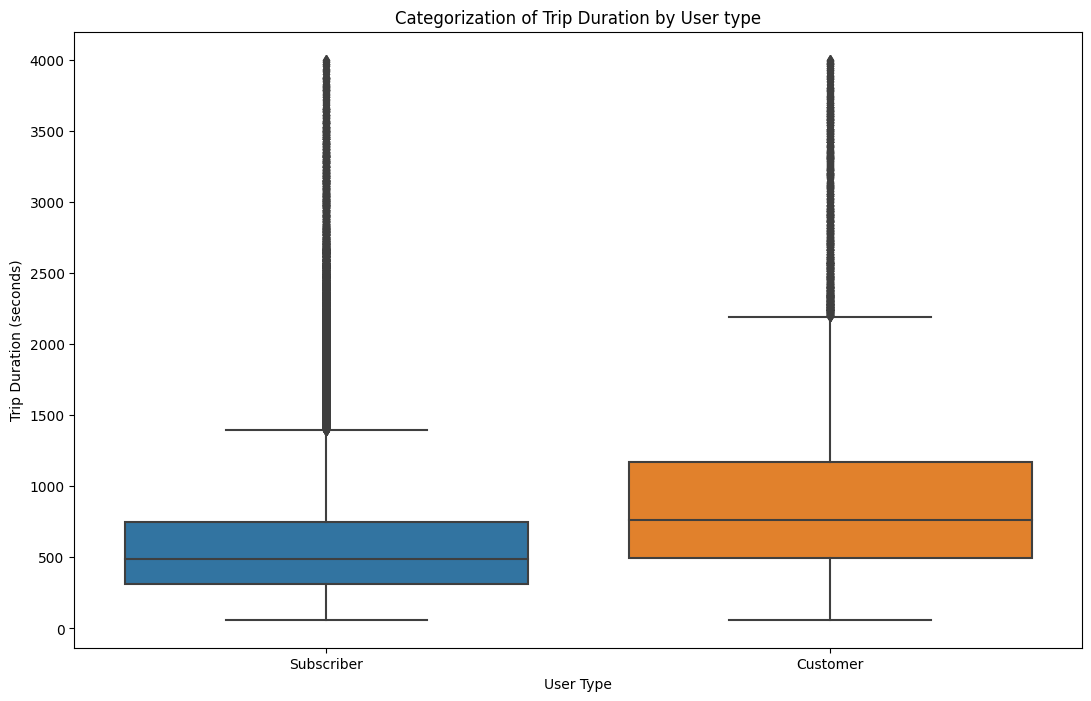

In [9]:
# Filter out extreme trip durations for better visualization
df_filtered = df[df['duration_sec'] < 4000]

# Set up the figure and axis
plt.figure(figsize=(13, 8))

# Create the box plot
sns.boxplot(x="user_type", y="duration_sec", data=df_filtered)

# Add title and labels
plt.title("Categorization of Trip Duration by User type")
plt.ylabel("Trip Duration (seconds)")
plt.xlabel("User Type")

# Show the plot
plt.show()

Observation: 

The box plot categorizes trip duration by user type, allowing us to compare the distribution of trip durations for subscribers and customers.

Subscribers generally have shorter trip durations, potentially reflecting their usage for daily commuting or short errands. Conversely, customers exhibit a wider range of trip durations, indicating more varied purposes such as leisure or exploration trips.

### Clustered Bar Chart - Frequency of Bike Share Utilization for All Trips
Question: What is the distribution of bike share utilization for all trips?

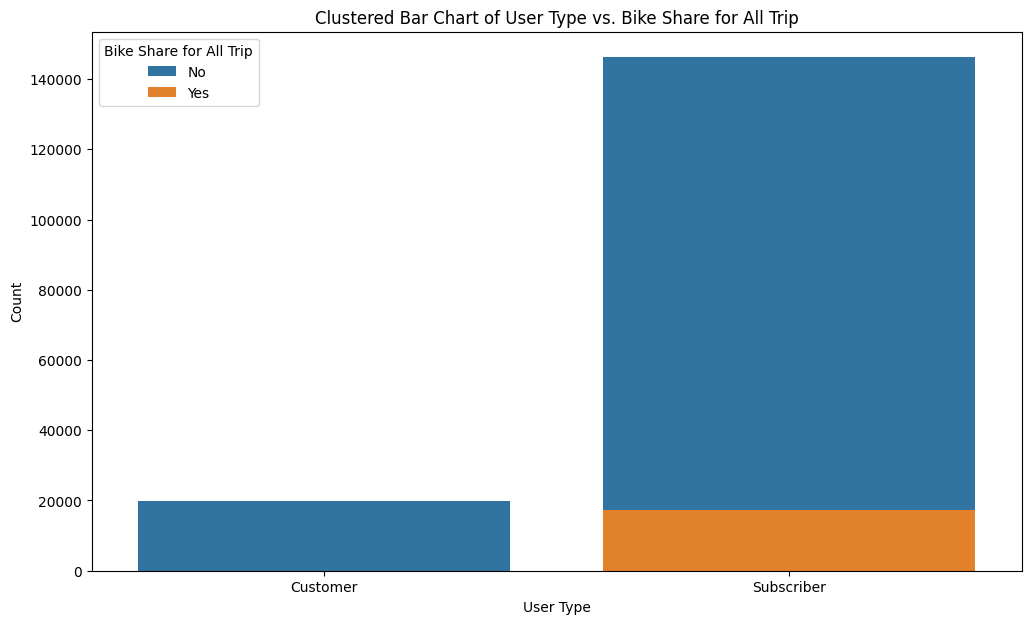

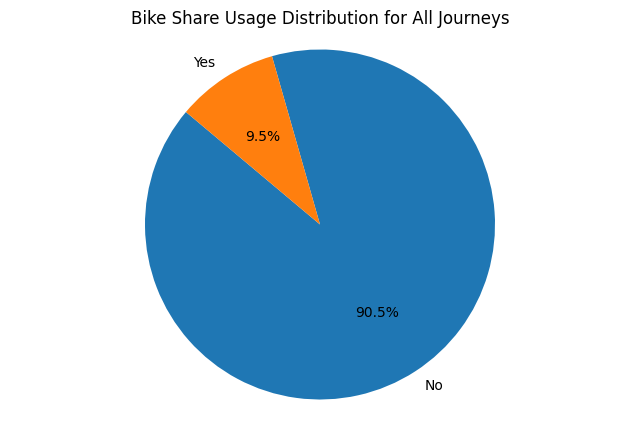

In [10]:
# Adjusting the figure size
plt.figure(figsize=(12, 7))

# Drawing the count plot (bar chart)
sns.countplot(data=df, x='user_type', hue='bike_share_for_all_trip', dodge=False)

# Setting the title and axis labels
plt.title('Clustered Bar Chart of User Type vs. Bike Share for All Trip')
plt.xlabel('User Type')
plt.ylabel('Count')

# Displaying the legend
plt.legend(title='Bike Share for All Trip')

# Displaying the plot
plt.show()

# Pie chart
# Calculate the distribution of bike share for all trips
bike_share_distribution = df['bike_share_for_all_trip'].value_counts()

# Pie chart
plt.figure(figsize=(8, 5))
plt.pie(bike_share_distribution, labels=bike_share_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Bike Share Usage Distribution for All Journeys')
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()


The chart illustrates the distribution of bike share utilization for all journeys. It reveals that 90.5% of trips do not utilize bike share for the entire journey, while 9.5% of trips do.

### Heat Map - Temporal Distribution of Ford GoBike Trips

Question: How do the number of Ford GoBike trips vary by hour of day and day of week?

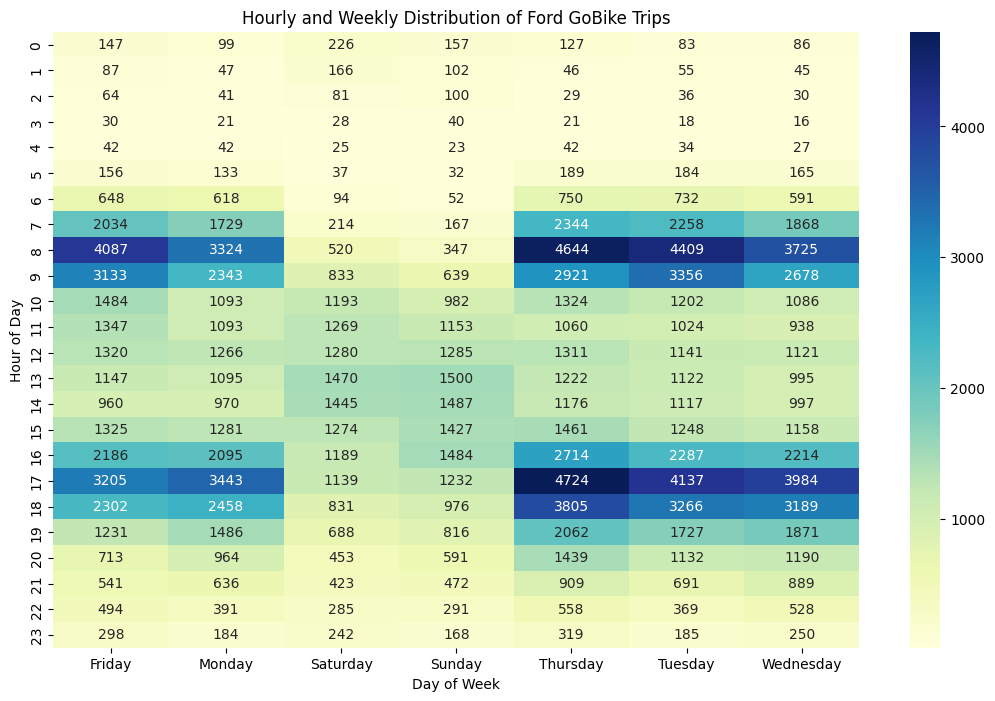

In [11]:
# Assuming 'start_time' column is in datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_day_of_week'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour

heatmap_data = df.pivot_table(index='start_hour', columns='start_day_of_week', values='bike_id', aggfunc='count')
plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Hourly and Weekly Distribution of Ford GoBike Trips")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.show()

Observation: 

The heatmap illustrates the hourly and weekly distribution of Ford GoBike trips. It reveals that peak usage occurs during typical commuting hours, specifically between 7-9 am and 4-6 pm. This suggests that many individuals utilize the bike service for work-related transportation, emphasizing its role in facilitating daily commutes. 

Additionally, weekdays experience significantly higher usage compared to weekends, with Monday, Tuesday, Wednesday, and Thursday, Friday emerging as the most popular days for bike trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. In the Scatter Plot - Trip Duration vs. Member Birth Year, we see that trip duration does not exhibit a straightforward linear trend with member birth year. However, there are clusters indicating specific age groups may have different trip duration tendencies.
2. Box Plot - Categorization of Trip Duration by User type: The box plot categorizes trip duration by user type, allowing us to compare the distribution of trip durations for subscribers and customers.Subscribers generally have shorter trip durations, potentially reflecting their usage for daily commuting or short errands. Conversely, customers exhibit a wider range of trip durations, indicating more varied purposes such as leisure or exploration trips.
3. Clustered Bar Chart - Frequency of Bike Share Utilization for All Trips: indicates that subscribers use bike share for all trips less frequently compared to customers. This suggests a potential difference in behavior or preference between the two user types regarding bike sharing.
4. Heat Map - Temporal Distribution of Ford GoBike Trips: The heatmap illustrates the hourly and weekly distribution of Ford GoBike trips. It reveals that peak usage occurs during typical commuting hours, specifically between 7-9 am and 4-6 pm. This suggests that many individuals utilize the bike service for work-related transportation, emphasizing its role in facilitating daily commutes. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, there were several interesting relationships observed between other features in the dataset:

- In the Scatter Plot - Trip Duration vs. Member Birth Year, we noticed clusters indicating specific age groups may have different trip duration tendencies. This suggests that member birth year, which serves as a proxy for age, can influence trip duration patterns.
- The Box Plot - Categorization of Trip Duration by User type revealed that subscribers generally have shorter trip durations compared to customers. This discrepancy suggests distinct usage patterns between the two user types, with subscribers possibly using the service for daily commuting or short errands, while customers may have more varied purposes such as leisure or exploration trips.
- The Clustered Bar Chart - Frequency of Bike Share Utilization for All Trips indicated that subscribers use bike share for all trips less frequently compared to customers. This difference in behavior or preference regarding bike sharing between the two user types is noteworthy and may have implications for bike share program management and marketing strategies.

## Multivariate Exploration

### Facet Plot - Trip Duration Distribution by Gender and Bike Share for All Trip

Question: How does the distribution of trip duration vary among different genders and bike share utilization for all trips?

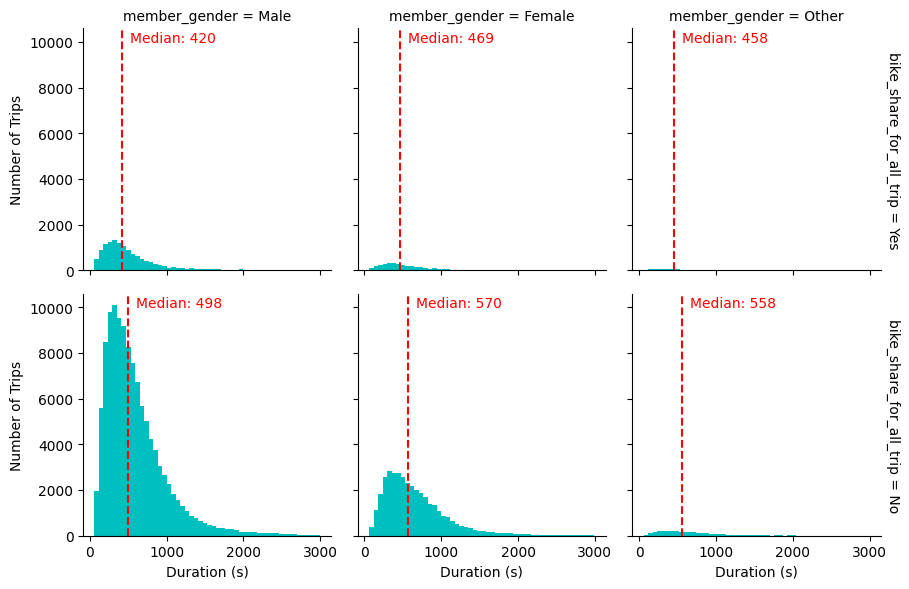

In [12]:
# Filter out extreme values for better visualization
data_filtered = df[df['duration_sec'] < 3000]

# Create the FacetGrid
g = sns.FacetGrid(data_filtered, col='member_gender', row='bike_share_for_all_trip', margin_titles=True)
g.map(plt.hist, 'duration_sec', bins=50, color='c')

# Add a vertical line to denote the median of each subplot's data
for (row_val, col_val), ax in g.axes_dict.items():
    subset = data_filtered[(data_filtered['member_gender'] == col_val) & (data_filtered['bike_share_for_all_trip'] == row_val)]
    median_val = subset['duration_sec'].median()
    ax.axvline(median_val, color='red', linestyle='--')
    ax.text(median_val + 100, ax.get_ylim()[1] - 100, f'Median: {median_val:.0f}', color='red', va='top')

# Setting axis labels
g.set_axis_labels("Duration (s)", "Number of Trips")

# Display the plot
plt.show()


Observation:

The distribution of trip duration by gender and bike share for all trip. Each facet in the plot represents the distribution of trip duration for a specific gender and bike share for all trip category. We can see that the distribution of trip duration varies significantly among gender groups and bike share for all trip categories.

### Scatterplot matrix - The pairwise relationships between trip duration, member birth year, and start station latitude

Question: How do the pairwise relationships between trip duration, member birth year, and start station latitude vary?

<Figure size 1000x800 with 0 Axes>

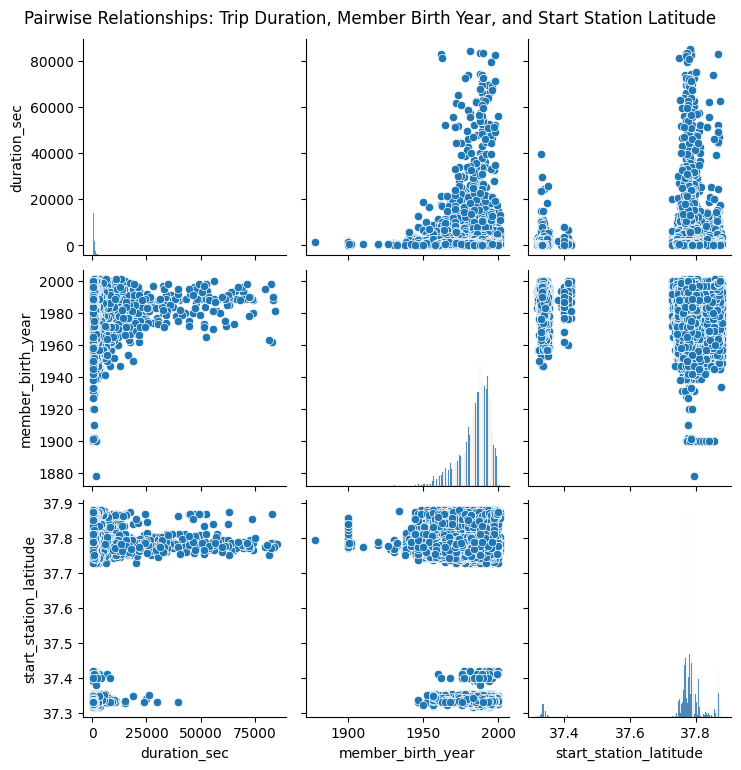

In [13]:
# Scatterplot matrix to visualize relationships between trip duration, member birth year, and start station latitude
plt.figure(figsize=(10, 8))
sns.pairplot(data=df, vars=['duration_sec', 'member_birth_year', 'start_station_latitude'])
plt.suptitle('Pairwise Relationships: Trip Duration, Member Birth Year, and Start Station Latitude', y=1.02)
plt.show()


Observation:
    
The relationships between trip duration, member birth year, and start station latitude. This plot shows the pairwise relationships between variables. We can observe some relationships, although there isn't a clear relationship between specific variables.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this part of the multivariate exploration, we conducted two types of plots: the Facet Plot and the Scatterplot Matrix.
- In the Facet Plot, we observed the distribution of trip duration by gender and bike share for all trip. Each facet in the plot represents the distribution of trip duration for a specific gender and bike share for all trip category. We can see that the distribution of trip duration varies significantly among gender groups and bike share for all trip categories.
- In the Scatterplot Matrix, we explored the relationships between trip duration, member birth year, and start station latitude. This plot shows the pairwise relationships between variables. We can observe some relationships, although there isn't a clear relationship between specific variables.

Overall, using multivariate plots helps us gain a better understanding of the relationships between variables and how they interact with each other.

### Were there any interesting or surprising interactions between features?

Throughout the exploration, there were some interesting interactions between variables:
- In the Facet Plot, there was a noticeable difference in the distribution of trip duration among gender groups and bike share for all trip categories. This indicates that trip duration may be influenced by both gender and the decision to share a bike for all trips.
- In the Scatterplot Matrix, there weren't any clear interactions between variables. However, we can continue to explore and analyze the relationships between variables through interaction with other variables or further modeling.

## Conclusions
During the exploration of the Ford GoBike System dataset, several key findings and insights were uncovered:

1. Trip Duration Distribution: The distribution of trip durations showed a peak around short durations, indicating that most trips are relatively brief. There were no significant outliers or unusual patterns observed in the trip duration distribution.
2. Member Birth Year Distribution: The distribution of member birth years clustered around certain periods, particularly in the 1980s and early 1990s. However, there were outliers around 1900 and 1930, which may require further investigation to understand.
3. Bivariate Exploration: Through bivariate exploration, various relationships between pairs of variables were examined. Subscribers tended to have shorter trip durations compared to customers, indicating potential differences in usage patterns between these user types. Additionally, there were differences in bike share utilization between user types, with subscribers using bike share for all trips less frequently than customers.
4. Multivariate Exploration: In the multivariate exploration, we delved deeper into the relationships between three or more variables. The Facet Plot revealed significant variations in trip duration distribution based on gender and bike share for all trip categories. Additionally, the Scatterplot Matrix helped explore the relationships between trip duration, member birth year, and start station latitude, although clear interactions between variables were not evident.

Overall, the exploration of the Ford GoBike System dataset provided valuable insights into usage patterns, user demographics, and potential factors influencing trip durations. Further analysis could focus on investigating the outliers observed in the member birth year distribution and exploring additional variables to better understand the dynamics of the bike-sharing system.

In [14]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_I_notebook.ipynb

[NbConvertApp] Converting notebook Part_I_notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 1056945 bytes to Part_I_notebook.html
